# **MNIST-GAN**
**Generative modeling** is an unsupervised learning task in machine learning that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn from the original dataset.
- There are two neural networks: a Generator and a Discriminator. The generator generates a "fake" sample given a random vector/matrix, and the discriminator attempts to detect whether a given sample is "real" (picked from the training data) or "fake" (generated by the generator)



### MNIST GAN
refers to a Generative Adversarial Network (GAN) trained on the MNIST dataset. The MNIST dataset is a classic benchmark dataset in the field of machine learning and computer vision, consisting of 28x28 grayscale images of handwritten digits from 0 to 9.


### PyTorch
is an open-source machine learning library, used for various tasks in machine learning and deep learning, including but not limited to neural network training, reinforcement learning, natural language processing, and computer vision.
- *PyTorch*: PyTorch is the overarching framework that provides the foundation for building and training neural networks. It offers tensor computation (similar to NumPy) with strong GPU acceleration, automatic differentiation for building and training neural networks.
- *Torch*: Torch is the predecessor of PyTorch, and it's an older machine learning library primarily implemented in Lua programming language. It provided similar functionalities to PyTorch but with a different design and syntax.
- *Torchvision*: torchvision is a package in PyTorch that provides tools and utilities for computer vision tasks. It includes popular datasets, pretrained models, image transformation functions

In [1]:
%pip install torch
%pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.9 MB/s eta 0:00:00


In [2]:
# We download and import the data as a 'PyTorch Dataset' using the MNIST helper class from 'torchvision.datasets'.
# torch: PyTorch library
import torch
# torchvision: PyTorch's computer vision library.
import torchvision
# ToTensor(): A transformation that converts PIL Image or numpy.ndarray to tensor.
# Normalize(): A transformation that normalizes tensor images with mean and standard deviation.
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST

mnist = MNIST(root='data',
              train=True,
              download=True,
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))



100%|██████████| 9912422/9912422 [00:00<00:00, 86509370.20it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 17170190.48it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 21215366.95it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5666427.36it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



We are transforming the pixel values from the range [0, 1] to the range [-1, 1]. The reason for doing this will become clear when define the generator network. Let's look at a sample tensor from the data.

In [3]:
# Retrieves the first sample from the MNIST dataset.
img, label = mnist[0]

# Print the label associated with the first sample
print('Label: ', label)

# Print a slice of the image tensor (subset of the image)
print(img[:,10:15,10:15])

# Find the minimum and maximum values in the image tensor
torch.min(img), torch.max(img)

Label:  5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])


(tensor(-1.), tensor(1.))

The pixel values range from -1 to 1. Let's define a helper to denormalize and view the images. This function will also be useful for viewing the generated images.

 **denorm(x)** A denormalization function commonly used in image processing tasks, particularly in deep learning applications where images are normalized before being fed into the model and then need to be denormalized for visualization or further processing.

In [4]:
def denorm(x):
    # (x + 1). This step is likely performed to undo the normalization where the pixel values were scaled to the range [-1, 1].
    # It divides each element of the tensor by 2 (/ 2). This step scales the values back to the original range [-0.5, 0.5].
    out = (x + 1) / 2

    # The clamp(0, 1) function call ensures that the values are bounded within the range [0, 1]. This is done to ensure that the denormalized values are valid pixel values
    return out.clamp(0, 1)

Label: 5


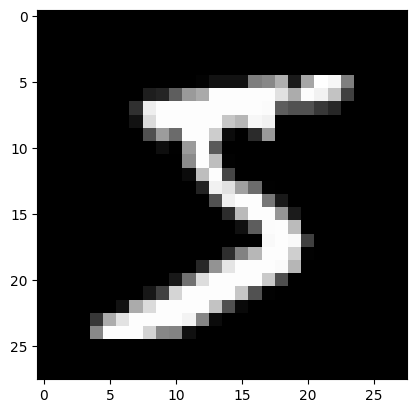

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# Allows Matplotlib plots to be displayed inline within the notebook.

# Denormalize the input image tensor
img_norm = denorm(img)

# Display the denormalized image using Matplotlib.
# This line uses Matplotlib's imshow function to display the denormalized image. Since MNIST images are grayscale, the colormap 'gray' is specified to display the image in grayscale.
plt.imshow(img_norm[0], cmap='gray')

# Print the label associated with the image
# This label corresponds to the digit represented by the image in the MNIST dataset.
print('Label:', label)

Let's create a dataloader to load the images in batches.

In [7]:
# The DataLoader class is used to load data from a dataset and provide an iterable over batches of data.
from torch.utils.data import DataLoader

batch_size = 100

data_loader = DataLoader(mnist, batch_size, shuffle=True)
# shuffle=True: This specifies that the data should be shuffled before creating batches.

first batch
torch.Size([100, 1, 28, 28])
tensor([4, 9, 2, 3, 3, 8, 4, 9, 4, 4, 3, 6, 2, 9, 0, 4, 9, 2, 4, 6, 5, 7, 0, 6,
        8, 8, 6, 0, 2, 8, 4, 5, 9, 0, 9, 9, 5, 6, 3, 5, 7, 7, 7, 5, 0, 1, 5, 9,
        4, 9, 4, 9, 4, 5, 4, 6, 2, 7, 8, 4, 8, 3, 5, 9, 8, 3, 7, 7, 1, 9, 0, 8,
        7, 3, 1, 7, 6, 1, 9, 5, 1, 0, 8, 5, 1, 7, 9, 5, 5, 3, 5, 5, 0, 4, 2, 0,
        0, 8, 5, 5])


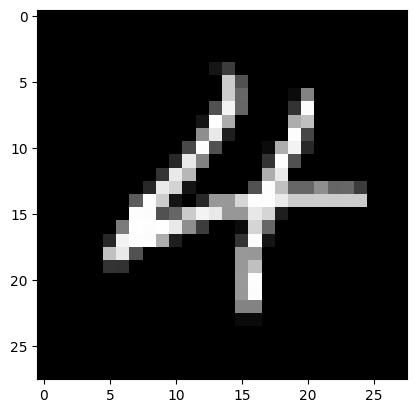

In [8]:
for img_batch, label_batch in data_loader:
    # Print a message indicating the start of processing the first batch
    print('first batch')

    # Print the shape of the image batch
    print(img_batch.shape)

    # Display the first image from the batch using Matplotlib
    plt.imshow(img_batch[0][0], cmap='gray')

    # Print the labels associated with the images in the batch
    print(label_batch)

    # Break the loop after processing the first batch
    break

We'll also create a device which can be used to move the data and models to a GPU, if one is available.


In [9]:
# Device configuration  CUDA (GPU support)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


# Discriminator Network
The discriminator takes an image as input, and tries to classify it as "real" or "generated". In this sense, it's like any other neural network. While we can use a CNN for the discriminator, we'll use a simple feedforward network with 3 linear layers to keep things since. We'll treat each 28x28 image as a vector of size 784.

In [10]:
# The input images are flattened to a vector of size 784. This is typical for MNIST dataset where the images are 28x28 pixels.
image_size = 784

# Defines the size of the hidden layer in the discriminator neural network.
# The hidden layer is a fully connected layer with 256 units.
hidden_size = 256

This discriminator architecture takes a flattened image vector as input, passes it through two hidden layers with Leaky ReLU activations, and produces a single output indicating the likelihood of the input being real.\

*The Leaky ReLU activations* are used to introduce non-linearity into the model, and the Sigmoid activation function at the output produces probabilities.

In [11]:
import torch.nn as nn

# 'D' is a simple neural network and here we are using PyTorch's 'nn.sequential' midule.
# This discriminator is used in GANs for tasks like Image Generation
# 'nn.Sequential' - A container module. Applies the modules listed in its constructor
# A convinient way to define a neural network with a sequential structure.

D = nn.Sequential(
    nn.Linear(image_size, hidden_size),  # Input layer: image_size -> hidden_size
    nn.LeakyReLU(0.2),                    # LeakyReLU activation function
    nn.Linear(hidden_size, hidden_size),  # Hidden layer: hidden_size -> hidden_size
    nn.LeakyReLU(0.2),                    # LeakyReLU activation function
    nn.Linear(hidden_size, 1),            # Output layer: hidden_size -> 1
    nn.Sigmoid()                          # Sigmoid activation function (to output probabilities)
)
#  Leaky ReLU activation function with a negative slope of 0.2. It introduces a small negative slope in the negative part of the linear function to avoid the "dying ReLU" problem.
# Sigmoid activation function applied to the output. It squashes the output value between 0 and 1, interpreting it as a probability.

### We use Leaky ReLU activation for the discriminator.

![image.png](attachment:image.png)
Different from the regular ReLU function, Leaky ReLU allows the pass of a small gradient signal for negative values. As a result, it makes the gradients from the discriminator flows stronger into the generator. Instead of passing a gradient (slope) of 0 in the back-prop pass, it passes a small negative gradient.

Just like any other binary classification model, the output of the discriminator is a single number between 0 and 1, which can be interpreted as the probability of the input image being fake i.e. generated.

Let's move the discriminator model to the chosen device.

In [12]:
D.to(device);

# Generator Network
The input to the generator is typically a vector or a matrix which is used as a seed for generating an image. Once again, to keep things simple, we'll use a feedfoward neural network with 3 layers, and the output will be a vector of size 784, which can be transformed to a 28x28 px image.

In [13]:
latent_size = 64

In [14]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),  # Input layer: latent_size -> hidden_size
    nn.ReLU(),                            # ReLU activation function
    nn.Linear(hidden_size, hidden_size),  # Hidden layer: hidden_size -> hidden_size
    nn.ReLU(),                            # ReLU activation function
    nn.Linear(hidden_size, image_size),   # Output layer: hidden_size -> image_size
    nn.Tanh()                             # Tanh activation function (to scale output to [-1, 1])
)

# The generator's final layer uses a hyperbolic tangent activation (nn.Tanh) to scale the output to the range [-1, 1], which is suitable for image data.

### We use the TanH activation function for the output layer of the generator.

![image.png](attachment:image.png)
"The ReLU activation (Nair & Hinton, 2010) is used in the generator with the exception of the output layer which uses the Tanh function. We observed that using a bounded activation allowed the model to learn more quickly to saturate and cover the color space of the training distribution. Within the discriminator we found the leaky rectified activation (Maas et al., 2013) (Xu et al., 2015) to work well, especially for higher resolution modeling."

Note that since the outputs of the TanH activation lie in the range [-1,1], we have applied the same transformation to the images in the training dataset. Let's generate an output vector using the generator and view it as an image by transforming and denormalizing the output.

In [15]:
# This line generates random noise vectors of size (2, latent_size) by sampling from a normal distribution (torch.randn(2, latent_size)).
# Each row in the tensor represents a noise vector for generating an image.
y = G(torch.randn(2, latent_size))

# Output y is reshaped into the shape (2, 28, 28) to match the dimensions of an image
gen_imgs = denorm(y.reshape((-1, 28,28)).detach())

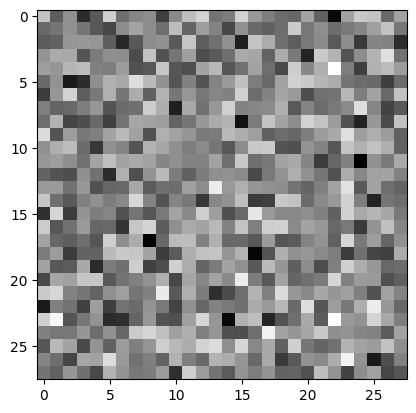

In [16]:
plt.imshow(gen_imgs[0], cmap='gray');

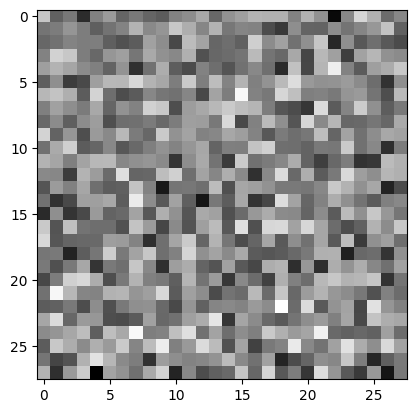

In [17]:
plt.imshow(gen_imgs[1], cmap='gray');

As one might expect, the output from the generator is basically random noise. Let's define a helper function which can save a batch of outputs from the generator to a file.

Let's move the generator to the chosen device.

In [18]:
G.to(device);

# Discriminator Training
Since the discriminator is a binary classification model, we can use the binary cross entropy loss function to quantify how well it is able to differentiate between real and generated images.
![image.png](attachment:image.png)

In [19]:
# the binary cross-entropy loss (BCELoss) and the Adam optimizer for training a discriminator neural network (D).
criterion = nn.BCELoss()

# This line initializes the Adam optimizer (torch.optim.Adam) for optimizing the parameters of the discriminator network (D).
# D.parameters() provides the parameters (weights and biases) of the discriminator network to be optimized.
# lr=0.0002 sets the learning rate for the optimizer.
# The learning rate determines the size of the step taken in the direction opposite to the gradient during optimization.
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)

By using the binary cross-entropy loss and the Adam optimizer, this setup is commonly used for training discriminator networks in adversarial learning frameworks, such as Generative Adversarial Networks (GANs).
- The discriminator's goal is to distinguish between real and fake data, and the BCE loss helps in achieving this by penalizing the difference between the discriminator's predictions and the ground truth labels.\
- The Adam optimizer is then used to minimize this loss function with respect to the discriminator's parameters.

Let's define helper functions to reset gradients and train the discriminator.

In [20]:
# function reset_grad() resets the gradients of both the discriminator and generator networks.
# It sets the gradients of all model parameters to zero
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

def train_discriminator(images):
    # Create the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    # Loss for real images
    outputs = D(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Loss for fake images
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Combine losses
    d_loss = d_loss_real + d_loss_fake
    # Reset gradients
    reset_grad()
    # Compute gradients
    d_loss.backward()
    # Adjust the parameters using backprop
    d_optimizer.step()

    return d_loss, real_score, fake_score

Here are the steps involved in training the discriminator.

* We expect the discriminator to output 1 if the image was picked from the real MNIST dataset, and 0 if it was generated.

* We first pass a batch of real images, and compute the loss, setting the target labels to 1.

* Then, we generate a batch of fake images using the generator, pass them into the discriminator, and compute the loss, setting the target labels to 0.

* Finally we add the two losses and use the overall loss to perform gradient descent to adjust the weights of the discriminator.

It's important to note that we don't change the weights of the generator model while training the discriminator (d_optimizer only affects the D.parameters())

# Generator Training
Since the outputs of the generator are images, it's not obvious how we can train the generator. This is where we employ a rather elegant trick, which is to use the discriminator as a part of the loss function. Here's how it works:

* We generate a batch of images using the generator, pass the into the discriminator.

* We calculate the loss by setting the target labels to 1 i.e. real. We do this because the generator's objective is to "fool" the discriminator.

* We use the loss to perform gradient descent i.e. change the weights of the generator, so it gets better at generating real-like images.

Here's what this looks like in code.

In [21]:
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [22]:
def train_generator():
    # Generate fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    labels = torch.ones(batch_size, 1).to(device)
    g_loss = criterion(D(fake_images), labels)

    # Backprop and optimize
    reset_grad()
    g_loss.backward()
    g_optimizer.step()
    return g_loss, fake_images

# Training the Model
Let's create a directory where we can save intermediate outputs from the generator to visually inspect the progress of the model

In [23]:
import os

sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

Let's save a batch of real images that we can use for visual comparision while looking at the generated images.

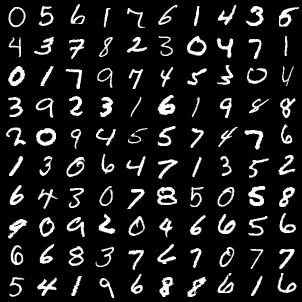

In [24]:
from IPython.display import Image
from torchvision.utils import save_image

# Save some real images
for images, _ in data_loader:
    images = images.reshape(images.size(0), 1, 28, 28)
    save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'), nrow=10)
    break

Image(os.path.join(sample_dir, 'real_images.png'))

We'll also define a helper function to save a batch of generated images to disk at the end of every epoch. We'll use a fixed set of input vectors to the generator to see how the individual generated images evolve over time as we train the model.

Saving fake_images-0000.png


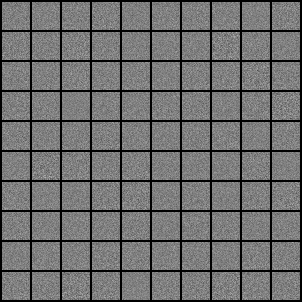

In [25]:
sample_vectors = torch.randn(batch_size, latent_size).to(device)

def save_fake_images(index):
    fake_images = G(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    print('Saving', fake_fname)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)

# Before training
save_fake_images(0)
Image(os.path.join(sample_dir, 'fake_images-0000.png'))

 We are now **ready to train** the model. In each epoch, we train the discriminator first, and then the generator. The training might take a while if you're not using a GPU.

In [31]:
%%time
# Used to measure the execution time of the cell

num_epochs = 25 # the number of epochs require for training
total_step = len(data_loader) # Computes the total number of batches in dataset loader
d_losses, g_losses, real_scores, fake_scores = [], [], [], [] # Emty lists to store discriminator, generator losses and real, fake scores

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader): #Iterates over batches of images from the data loader.
        # Load a batch & transform to vectors
        images = images.reshape(batch_size, -1).to(device) #Reshapes the images batch into a format suitable for the model and moves them to the specified device (e.g., GPU).

        # Train the discriminator and generator
        d_loss, real_score, fake_score = train_discriminator(images) #Trains the discriminator using the current batch of real images and computes the discriminator loss along with real and fake scores.
        g_loss, fake_images = train_generator() # Trains the generator and computes the generator loss along with the generated fake images.

        # Inspect the losses
        if (i+1) % 200 == 0: #  Prints and records the discriminator and generator losses, as well as real and fake scores, every 200 steps.
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}'
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(),
                          real_score.mean().item(), fake_score.mean().item()))

    # Sample and save images
    save_fake_images(epoch+1) # Calls a function to generate and save fake images at the end of each epoch.

Epoch [0/25], Step [200/600], d_loss: 0.0415, g_loss: 4.4527, D(x): 0.99, D(G(z)): 0.03
Epoch [0/25], Step [400/600], d_loss: 0.0998, g_loss: 5.1635, D(x): 0.96, D(G(z)): 0.03
Epoch [0/25], Step [600/600], d_loss: 0.0764, g_loss: 4.6043, D(x): 0.97, D(G(z)): 0.04
Saving fake_images-0001.png
Epoch [1/25], Step [200/600], d_loss: 0.1011, g_loss: 3.9759, D(x): 0.97, D(G(z)): 0.06
Epoch [1/25], Step [400/600], d_loss: 1.6457, g_loss: 1.4956, D(x): 0.43, D(G(z)): 0.09
Epoch [1/25], Step [600/600], d_loss: 0.3584, g_loss: 5.7037, D(x): 0.91, D(G(z)): 0.12
Saving fake_images-0002.png
Epoch [2/25], Step [200/600], d_loss: 0.8573, g_loss: 3.6186, D(x): 0.85, D(G(z)): 0.39
Epoch [2/25], Step [400/600], d_loss: 0.2069, g_loss: 3.4240, D(x): 0.92, D(G(z)): 0.07
Epoch [2/25], Step [600/600], d_loss: 0.3830, g_loss: 3.1381, D(x): 0.82, D(G(z)): 0.10
Saving fake_images-0003.png
Epoch [3/25], Step [200/600], d_loss: 0.7324, g_loss: 2.1847, D(x): 0.69, D(G(z)): 0.11
Epoch [3/25], Step [400/600], d_loss

In [32]:
# Save the model checkpoints
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')

Here's how the generated images look, after the 10th, 15th and 25th Epochs epochs of training.\
Generally we had to do 300 epochs which would show very clear image but here i have reduced the number of epochs from 300 to 25 for the sake of simplicity.

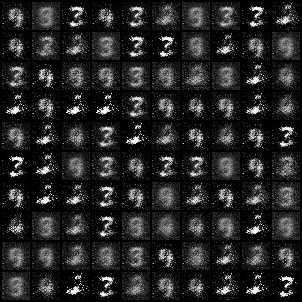

In [33]:
Image('./samples/fake_images-0010.png')

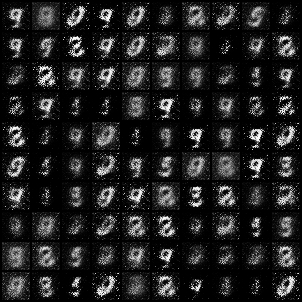

In [34]:
Image('./samples/fake_images-0015.png')

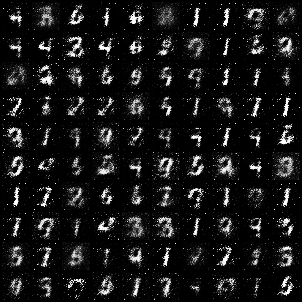

In [35]:
Image('./samples/fake_images-0025.png')

We can visualize the training process by combining the sample images generated after each epoch into a video using OpenCV.

In [36]:
pip install opencv-python

In [37]:
# The provided code is creating a video file named 'gans_training.avi' by stitching together individual image frames saved in the directory specified by the variable 'sample_dir'. The images are sorted and added to the video file using OpenCV.
# Finally, a link to download the video file is generated using IPython's FileLink.
import cv2
import os
from IPython.display import FileLink

vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'fake_images' in f]
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 8, (302,302))
[out.write(cv2.imread(fname)) for fname in files]
out.release()
FileLink('gans_training.avi')

/content/gans_training.avi

We can also visualize how the loss changes over time. Visualizing losses is quite useful for debugging the training process. For GANs, we expect the generator's loss to reduce over time, without the discriminator's loss getting too high.

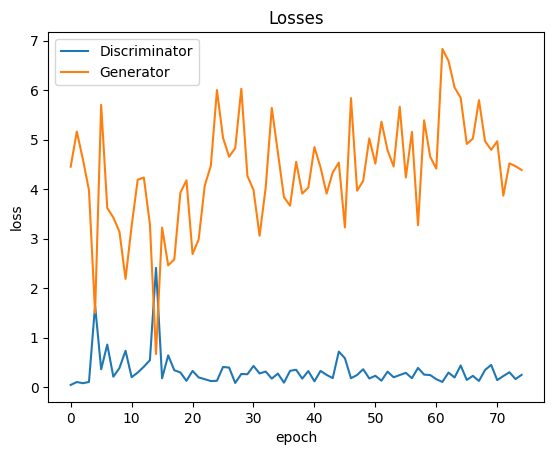

In [38]:
# This step involves plotting the losses of both the discriminator and the the generator over time during the training process of a GAN.
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

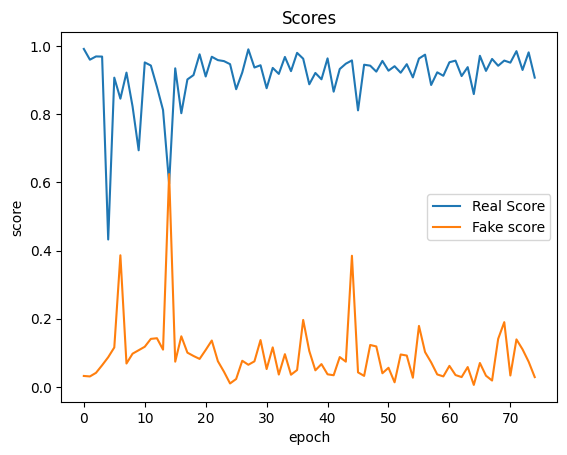

In [39]:
# This block of code is providing the scores of real and fake samples generated by the discriminator over the course of trainig a GAN.
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');